In [160]:
%load_ext autoreload 
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pyro
import pyro.distributions as dist
from pyro import infer, poutine
from pyro.infer import Importance, EmpiricalMarginal
plt.style.use("seaborn-v0_8")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([1.06920479, 0.99947794, 0.9889986 , 1.09732362, 0.75159327,
       0.98615177, 0.81550475, 1.01676479, 1.2056595 , 0.76682853,
       1.00855934, 0.91400131, 0.99092949, 0.88259688, 0.7017251 ,
       0.5133359 , 0.98788283, 0.92411438, 0.99805406, 0.97122817,
       0.69260155, 1.03385632, 1.19914575, 0.9843289 , 2.7113952 ,
       0.98252764, 1.37990607, 1.11898734, 0.85783574, 0.73869881,
       0.41076798, 0.98753342, 1.13731506, 0.92028522, 1.36680789,
       0.98641525, 0.9817772 , 1.00269096, 0.91240685, 0.99923449,
       0.89614741, 1.21048371, 0.9999958 , 0.25561503, 1.00192929,
       1.00032419, 1.29966136, 0.21974112, 0.7789392 , 0.89067204,
       1.03313051, 0.91157718, 1.15130647, 0.97180943, 1.47012165,
       0.6106709 , 0.99681958, 1.11008478, 0.94711273, 1.76827938,
       2.99445853, 0.68125841, 0.99920167, 0.60433968, 0.21926279,
       0.77072227, 1.03414574, 0.3605399 , 1.06493622, 1.52647516,
       1.013191  , 0.79421029, 1.15411182, 1.01897907, 1.00038

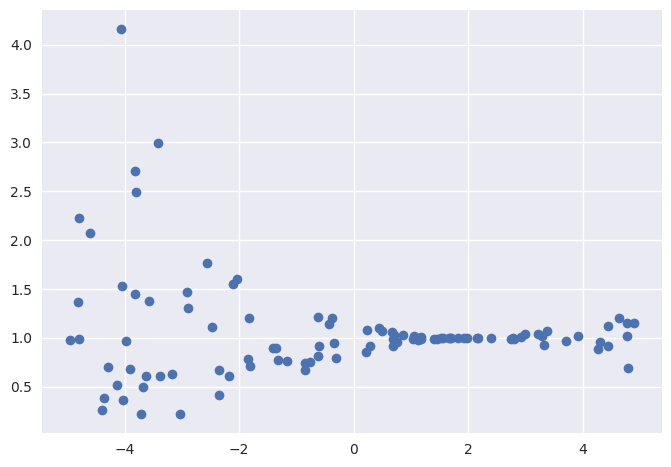

In [161]:
pyro.set_rng_seed(0)
N = 100
x = np.random.uniform(-5, 5, (100,))
y = np.exp(-2 * np.random.randn(N) * np.square(x- 2)  / 398 * 5)
plt.plot(x, y, "o")
y

array([ 5.69414657,  1.9968592 ,  4.93963245,  5.72753657,  5.21596093,
        3.985258  ,  5.42360091, -3.09261124, -4.09867445,  4.42550892,
       -0.43738177,  5.83144336,  5.48719946, -3.68210122, -4.27948269,
       -4.03241563, -4.73150183, -1.6509406 , -0.01155343, -2.61650093,
       -4.18565829, -0.66684305,  5.69329455, -0.08655843, -3.42527761,
        4.13330187, -2.82569594, -3.92513663,  5.86076582,  5.06310448,
        0.9249644 ,  0.11289429,  5.64284477,  5.48227533, -4.73670957,
        4.64204756,  4.75702728,  4.65687191, -3.91496297,  3.00714079,
        3.83581502,  5.41602052,  2.5378278 , -4.4182161 ,  3.43376071,
        3.32616299, -0.86129314, -3.18176314,  2.56888134,  3.94506767,
        5.45962526,  5.43729712, -4.21843142, -3.76201409, -0.90954152,
       -2.34436604,  3.80042351,  0.55009095,  5.73412837,  0.25498623,
       -2.40930094, -3.59451482,  3.71585727, -2.95662705, -1.29818988,
        4.07234998, -1.31953229, -3.85590902, -1.79830997, -3.87

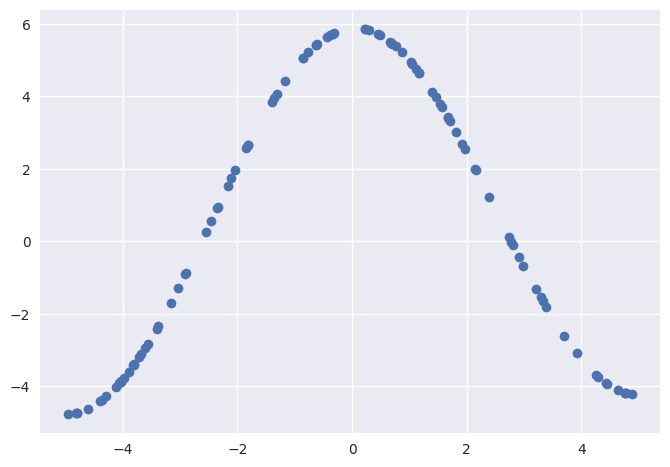

In [162]:
pyro.set_rng_seed(0)
N = 100
x = np.random.uniform(-5, 5, (100,))
y = np.exp(-3 * 0.58 * np.square(x- 2)  / (2*np.linalg.norm(x))) + 5*np.cos(2*x/np.pi)
plt.plot(x, y, "o")
y

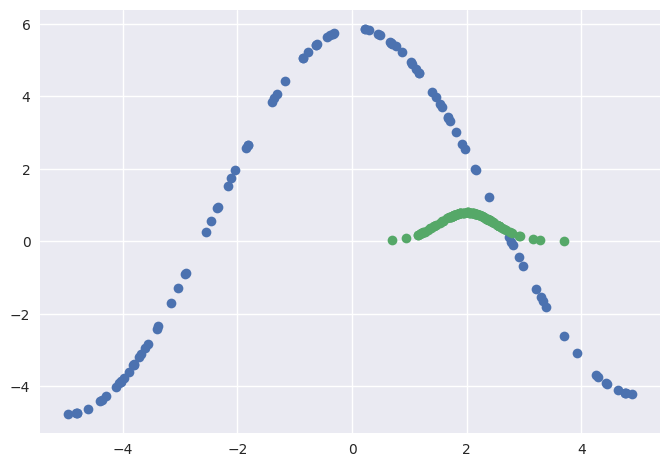

In [163]:
pyro.set_rng_seed(0)
N = 100
x = np.random.uniform(-5, 5, (100,))
y = np.exp(-3 * 0.58 * np.square(x- 2)  / (2*np.linalg.norm(x))) + 5*np.cos(2*x/np.pi)
prop_dist = dist.Normal(2, 0.5)
prop_samples = prop_dist.sample((N,))
plt.plot(x, y, "o", label="target")
plt.plot(prop_samples, prop_dist.log_prob(prop_samples).exp(), "o", 
         label="proposal")

In [164]:
x, y = torch.tensor(x).float(), torch.tensor(y).float()

In [165]:
dist.Delta(torch.tensor(1.0))

Delta(v: 1.0, log_density: 0.0)

In [166]:
def model():
    mu = pyro.sample("mu", dist.Delta(torch.tensor(-2.0)))
    print(mu)
    sigma = pyro.sample("sigma",dist.Delta(torch.tensor(1.0)))
    with pyro.plate("data", N):
        obs = pyro.sample("obs", dist.Normal(mu, sigma), obs=y)
    return obs
pyro.clear_param_store()
pyro.set_rng_seed(0)
imp_samp = Importance(model, num_samples=N)
imp_samp.run()

tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tensor(-2.)
tens

In [167]:
imp_samp.get_normalized_weights()

tensor([0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100,
        0.0100])

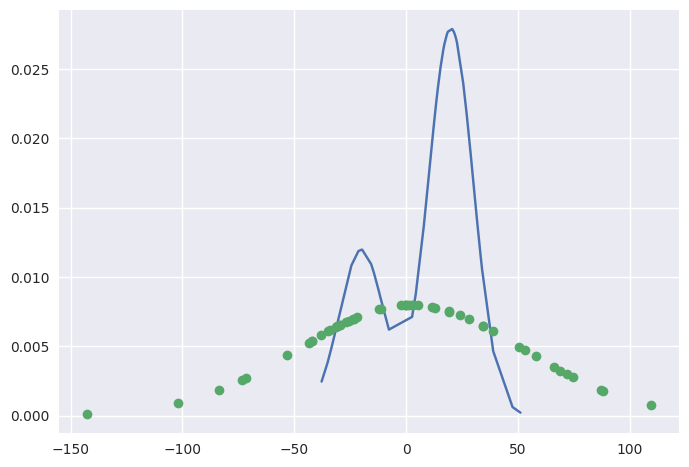

In [168]:
torch.manual_seed(0)
pyro.set_rng_seed(0)
μ = torch.tensor([-20., 20])
π = torch.tensor([0.3, 0.7])
Σ = torch.ones(2) * 10.
N = 50
clusters = torch.multinomial(π, N, replacement=True)
comp_dist =[dist.Normal(μ[i], Σ[i]) for i in range(len(μ))]
samples = torch.tensor([comp_dist[i].sample().item() for i in clusters ])
probs = torch.tensor([ π[0] * comp_dist[0].log_prob(samples[j]).exp() +  π[1] * comp_dist[1].log_prob(samples[j]).exp()
         for j in range(len(samples))])
prop_dist = dist.Normal(2, 50.)
prop_samples = prop_dist.sample((N,))

plt.plot(torch.sort(samples).values, 
         probs.gather(0, torch.argsort(samples)), 
         label="GMM"
         )
plt.plot(prop_samples, 
         prop_dist.log_prob(prop_samples).exp(), 
         "o", 
         label="proposal"
        )

In [169]:
def model():
    z = pyro.sample("π", dist.Categorical(π))
    x = pyro.sample("x", dist.Normal(μ[z], Σ[z]))
    return x

def guide():
    x = pyro.sample("x", prop_dist)
    return x

pyro.clear_param_store()
pyro.set_rng_seed(0)
imp_samp = Importance(model, guide, num_samples=N)
imp_samp.run()

In [170]:
emp = EmpiricalMarginal(imp_samp.run())

In [171]:
emp._samples.mean(), len(emp._samples)

(tensor(4.0905), 50)

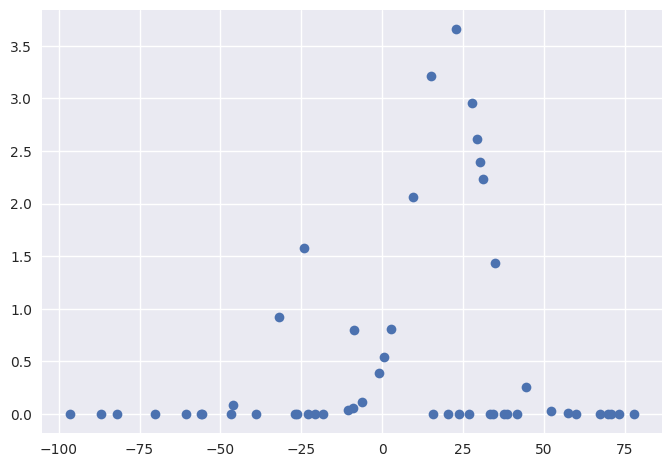

In [172]:
plt.plot(emp._samples, emp.log_weights.exp(), "o")

In [173]:
emp._samples

tensor([  0.6613,  34.3034, -26.9399,   2.8861, -38.9641,  27.7803, -46.7962,
         37.5619, -45.9444,  41.5836, -86.9332,  44.3826,  77.7598,  20.4915,
         15.6935,  30.3963, -20.5968, -18.2643, -26.3232, -55.6808,  59.9990,
         -8.9793,  26.9393, -24.1662, -56.0932,  22.9360,  -6.1773, -10.5232,
        -81.9706,  31.1333, -31.9510,  73.2542,  15.1031,  -8.5759, -22.8333,
         67.5014,  69.8225,  38.7026, -96.5288,  33.4042,  29.3852,  23.9168,
        -60.6740,  -0.9580,   9.6082, -70.1847,  57.3787,  34.8898,  70.8378,
         52.2728])

In [176]:
def model():
    z = pyro.sample("π", dist.Categorical(π))
    x = pyro.sample("x", dist.Normal(μ[z], Σ[z]))
    print("Model ", x)
    
    return x

def guide():
    x = pyro.sample("x", prop_dist)
    print("Guide ", x)
    return x

pyro.clear_param_store()
pyro.set_rng_seed(100)
imp_samp = Importance(model, guide, num_samples=5)
imp_samp.run()
emp = EmpiricalMarginal(imp_samp.run())
print("emp samples: ", emp._samples)

Guide  tensor(20.0328)
Model  tensor(20.0328)
Guide  tensor(-12.2961)
Model  tensor(-12.2961)
Guide  tensor(61.3427)
Model  tensor(61.3427)
Guide  tensor(45.9895)
Model  tensor(45.9895)
Guide  tensor(-13.8598)
Model  tensor(-13.8598)
Guide  tensor(-41.3023)
Model  tensor(-41.3023)
Guide  tensor(15.4988)
Model  tensor(15.4988)
Guide  tensor(-49.0415)
Model  tensor(-49.0415)
Guide  tensor(-116.2580)
Model  tensor(-116.2580)
Guide  tensor(-38.2341)
Model  tensor(-38.2341)
emp samples:  tensor([ -41.3023,   15.4988,  -49.0415, -116.2580,  -38.2341])


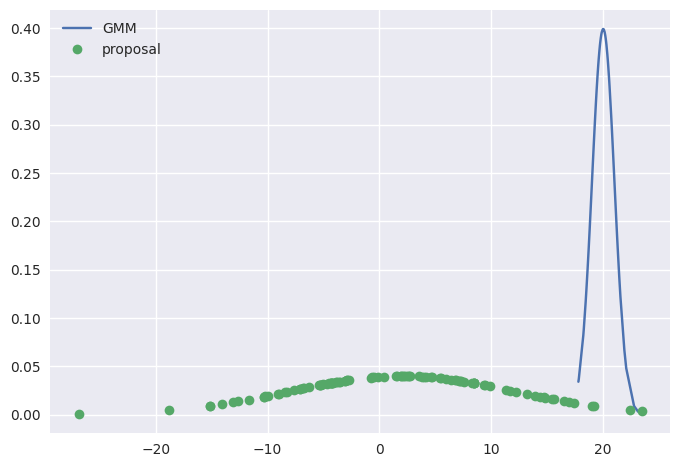

In [211]:
torch.manual_seed(0)
pyro.set_rng_seed(0)
m = torch.tensor(20.)
s = torch.ones(1)
N = 100
comp_dist = dist.Normal(m, s) 
samples = torch.tensor([comp_dist.sample().item() for i in range(N) ])
probs = torch.tensor([comp_dist.log_prob(samples[j]).exp()
         for j in range(len(samples))])
prop_dist = dist.Normal(2, 10.)
prop_samples = prop_dist.sample((N,))

plt.plot(torch.sort(samples).values, 
         probs.gather(0, torch.argsort(samples)), 
         label="GMM"
         )
plt.plot(prop_samples, 
         prop_dist.log_prob(prop_samples).exp(), 
         "o", 
         label="proposal"
        )
plt.legend()

In [212]:
def model():
    x = pyro.sample("x", dist.Normal(20., 1.))
    print("Model ", x)
    
    return x

def guide():
    x = pyro.sample("x", prop_dist)
    print("Guide ", x)
    # return x

pyro.clear_param_store()
pyro.set_rng_seed(100)
imp_samp = Importance(model, guide, num_samples=5)
imp_samp.run()
emp = EmpiricalMarginal(imp_samp.run())
print("emp samples: ", emp._samples)

Guide  tensor(5.6066)
Model  tensor(5.6066)
Guide  tensor(-0.8592)
Model  tensor(-0.8592)
Guide  tensor(-1.9382)
Model  tensor(-1.9382)
Guide  tensor(4.4294)
Model  tensor(4.4294)
Guide  tensor(-11.8332)
Model  tensor(-11.8332)
Guide  tensor(-21.1344)
Model  tensor(-21.1344)
Guide  tensor(-1.1720)
Model  tensor(-1.1720)
Guide  tensor(-6.6605)
Model  tensor(-6.6605)
Guide  tensor(19.4819)
Model  tensor(19.4819)
Guide  tensor(-0.7586)
Model  tensor(-0.7586)
emp samples:  tensor([-21.1344,  -1.1720,  -6.6605,  19.4819,  -0.7586])


In [213]:
emp._get_samples_and_weights()

(tensor([-21.1344,  -1.1720,  -6.6605,  19.4819,  -0.7586]),
 tensor([-841.0392, -221.7729, -352.7126,    3.6965, -213.1196]))

In [214]:
samples_prop = torch.tensor([-21.1344,  -1.1720,  -6.6605,  19.4819,  -0.7586])

In [215]:
comp_dist.log_prob(prop_samples) - prop_dist.log_prob(prop_samples)

tensor([-2.6462e+02, -6.1354e+02, -2.6439e+02, -2.5634e+02, -2.9357e+02,
        -5.3052e+02, -3.5603e+02, -7.4764e+02, -4.1773e+02, -3.1499e+02,
        -1.5756e+02, -1.0425e+02, -2.1055e+02, -1.0373e+01, -1.5622e+02,
        -3.5664e+02, -9.0265e+01, -1.6163e+02, -7.4577e+00, -2.1385e+02,
        -2.7410e+02, -1.0929e+03, -5.4436e+02, -2.7273e+01, -1.2642e+02,
        -3.1927e+02,  3.2488e+00, -1.0331e+02, -3.1578e+01, -2.7620e+00,
        -1.6917e+02, -2.9236e+02, -2.9854e+02,  3.4601e+00, -3.7838e+02,
        -2.9457e+02, -1.4652e+02, -7.4424e+01, -7.8023e+01, -1.2891e+01,
        -4.1963e+02, -6.1481e+02, -4.2865e-02, -1.6028e+02, -5.7557e+02,
        -1.4941e+02, -2.9280e+02, -5.2897e+01, -1.5677e+01, -1.8928e+02,
        -1.6800e+02, -6.3788e+01, -7.8983e+01, -1.2280e+02, -1.4864e+02,
        -6.3831e+01, -1.5380e+02, -3.9577e+02, -5.4298e+01, -2.0348e+01,
        -1.4907e+00, -3.6416e+02, -3.0277e+02, -2.8085e+02, -1.3834e+00,
        -3.1008e+02, -1.2881e+02, -6.3836e+00,  1.5

In [216]:
(comp_dist.log_prob(prop_samples) - prop_dist.log_prob(prop_samples)).exp()

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.1253e-05, 0.0000e+00, 0.0000e+00, 6.2864e-40, 0.0000e+00,
        5.7700e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4307e-12,
        0.0000e+00, 0.0000e+00, 2.5759e+01, 1.4013e-45, 1.9321e-14, 6.3162e-02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1819e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 4.7631e-33, 1.3032e-34, 2.5210e-06, 0.0000e+00, 0.0000e+00,
        9.5804e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0646e-23,
        1.5550e-07, 0.0000e+00, 0.0000e+00, 1.9829e-28, 4.9915e-35, 0.0000e+00,
        0.0000e+00, 1.8993e-28, 0.0000e+00, 0.0000e+00, 2.6215e-24, 1.4553e-09,
        2.2522e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5071e-01, 0.0000e+00,
        0.0000e+00, 1.6890e-03, 4.7829e+00, 1.0557e-28, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.6585e-

In [236]:
def model():
    x = pyro.sample("x", dist.Normal(20., 1.))
    return x

def guide():
    x = pyro.sample("x", prop_dist)
    # return x

pyro.clear_param_store()
pyro.set_rng_seed(100)
imp_samp = Importance(model, guide, num_samples=1000)
imp_samp.run()
emp = EmpiricalMarginal(imp_samp.run())

In [237]:
s, w = emp._get_samples_and_weights()

In [238]:
w.exp().max()

tensor(51.2201)

In [239]:
weights = torch.hstack(imp_samp.log_weights)


In [240]:
weights_norm = weights.exp() / weights.exp().sum()

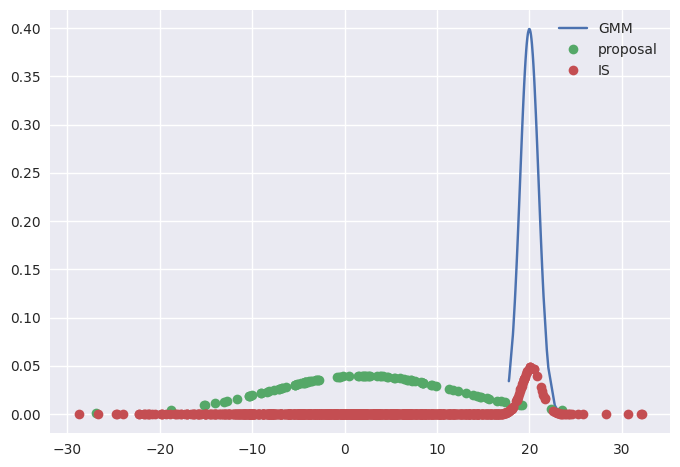

In [241]:
plt.plot(torch.sort(samples).values, 
         probs.gather(0, torch.argsort(samples)), 
         label="GMM"
         )
plt.plot(prop_samples, 
         prop_dist.log_prob(prop_samples).exp(), 
         "o", 
         label="proposal"
        )
plt.plot(s, weights_norm, "o", label="IS")
plt.legend()

In [244]:
torch.var_mean(s)

(tensor(100.8205), tensor(2.2641))